In [15]:
import os
import pandas as pd
df = pd.read_csv(os.path.join('data','commit.csv'))
pr_df = pd.read_csv(os.path.join('data','pr.csv'))
issue_df = pd.read_csv(os.path.join('data','issue.csv'))

In [16]:
df

,Contributor,Commit_message,Author_email,Author_name,Updated at,Files_changed,Files_changed_count,All_checks_passed,Additions
0,alextran1502,Initial commit,alex.tran1502@gmail.com,Alex,2022-02-03 15:56:28,['LICENSE'],1,True,21
1,alextran1502,Transfer repository from Gitlab,alex.tran1502@gmail.com,Tran Alex,2022-02-03 16:06:44,"['mobile/.gitignore', 'mobile/.metadata', 'mob...",177,True,13300
2,alextran1502,Added successfully built docker-compose and co...,alex.tran1502@gmail.com,Alex Tran,2022-02-03 20:42:27,['mobile/lib/modules/home/views/home_page.dart...,15,True,198
3,alextran1502,"Add readme for top level folder, clean up dead...",alex.tran1502@gmail.com,Alex Tran,2022-02-03 21:27:31,"['README.md', 'server/Dockerfile', 'server/REA...",7,True,90
4,alextran1502,Update readme with known problem of cpu missin...,alex.tran1502@gmail.com,Alex Tran,2022-02-03 21:46:41,['README.md'],1,True,14
...,...,...,...,...,...,...,...,...,...
4028,alextran1502,feat(mobile): compatibility message warning (#...,alex.tran1502@gmail.com,Alex,2024-06-10 17:43:54,"['mobile/lib/pages/login/login.page.dart', 'mo...",10,True,350
4029,zackpollard,docs: otel metrics port worker split (#10085),zackpollard@ymail.com,Zack Pollard,2024-06-10 17:44:10,['docs/docs/install/environment-variables.md'],1,True,13
4030,alextran1502,Version v1.106.0,alex.tran1502@gmail.com,Alex The Bot,2024-06-10 17:50:00,"['cli/package-lock.json', 'e2e/package-lock.js...",16,True,25
4031,aviv926,docs: add detect duplicate assets to roadmap (...,51673860+aviv926@users.noreply.github.com,aviv,2024-06-10 21:49:10,['docs/src/pages/roadmap.tsx'],1,True,14


In [17]:
pr_df

,Pr_state,Created_at,Updated_at,Additions,Commits,Merged_at
0,open,2024-06-10 10:38:14,2024-06-10 10:48:47,2,1,NaN
1,open,2024-06-09 21:48:28,2024-06-10 00:26:35,66,1,NaN
2,closed,2024-06-09 19:07:24,2024-06-09 19:18:02,39,1,2024-06-09 19:18:02
3,closed,2024-06-09 17:43:42,2024-06-09 19:48:47,3,1,Rejected
4,closed,2024-06-09 16:30:27,2024-06-09 19:18:41,0,1,2024-06-09 19:18:41
...,...,...,...,...,...,...
4324,closed,2022-02-08 17:24:07,2024-03-12 15:28:50,343,2,2022-02-08 17:24:49
4325,closed,2022-02-08 05:42:11,2024-02-13 22:15:20,10715,2,2022-02-08 05:42:35
4326,closed,2022-02-07 02:28:28,2024-03-09 23:22:33,133,3,2022-02-07 02:31:32
4327,closed,2022-02-06 18:08:06,2024-03-09 04:16:39,53,2,2022-02-06 19:06:01


In [18]:
issue_df

,Created_at,Closed_at,State,Labels,Assignees
0,2024-06-10 11:58:48,NaN,open,[],[]
1,2024-06-10 10:38:14,NaN,open,"['dependencies', 'github_actions']",[]
2,2024-06-10 09:03:16,2024-06-10 09:09:21,closed,[],[]
3,2024-06-09 21:48:28,NaN,open,['📱mobile'],[]
4,2024-06-09 19:07:24,2024-06-09 19:18:02,closed,['github_actions'],[]
...,...,...,...,...,...
7264,2022-02-06 06:37:29,2022-02-08 06:27:24,closed,['enhancement'],[]
7265,2022-02-06 06:37:24,2022-02-08 03:44:44,closed,['enhancement'],[]
7266,2022-02-06 06:37:08,2022-02-06 06:50:47,closed,[],[]
7267,2022-02-06 06:07:43,2022-02-06 06:07:56,closed,[],[]


In [33]:
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
start = datetime.datetime(2022,2,3)
end = datetime.datetime(2024, 6, 10)

COMMITS

In [78]:
len(df[df['Updated at'].isnull()])

0

In [140]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
commit_counts = df.groupby(df['Updated at'].dt.date).size()
commit_counts = commit_counts.reset_index(name = 'Commit count')
commit_counts

,Updated at,Commit count
0,2022-02-03,6
1,2022-02-04,8
2,2022-02-05,1
3,2022-02-06,6
4,2022-02-07,10
...,...,...
677,2024-06-06,10
678,2024-06-07,11
679,2024-06-08,11
680,2024-06-09,5


In [134]:
commit_counts_by_weeks = pd.DataFrame()
commit_counts_by_weeks['Week'] = pd.to_datetime(df['Updated at']).dt.strftime('%Y-%W')
commit_counts_by_weeks = commit_counts_by_weeks.sort_values('Week')
commit_counts_by_weeks = commit_counts_by_weeks.groupby('Week').size().reset_index(name='Commit count')

commit_counts_by_weeks

,Week,Commit count
0,2022-05,21
1,2022-06,32
2,2022-07,6
3,2022-08,5
4,2022-09,3
...,...,...
110,2024-20,84
111,2024-21,72
112,2024-22,56
113,2024-23,59


In [135]:
commit_counts_by_months = pd.DataFrame()
commit_counts_by_months['Month'] = pd.to_datetime(df['Updated at']).dt.strftime('%Y-%m')
commit_counts_by_months = commit_counts_by_months.sort_values('Month')
commit_counts_by_months = commit_counts_by_months.groupby('Month').size().reset_index(name='Commit count')


In [128]:
commit_counts_by_months

,Month,Commit count
0,2022-02,64
1,2022-03,59
2,2022-04,24
3,2022-05,39
4,2022-06,55
5,2022-07,88
6,2022-08,109
7,2022-09,110
8,2022-10,138
9,2022-11,88


In [70]:
commit_counts_by_years = pd.DataFrame()
commit_counts_by_years['Year'] = df['Updated at'].dt.year
commit_counts_by_years = commit_counts_by_years.groupby('Year').size().reset_index(name='Commit count')
commit_counts_by_years

,Year,Commit count
0,2022,880
1,2023,1846
2,2024,1307


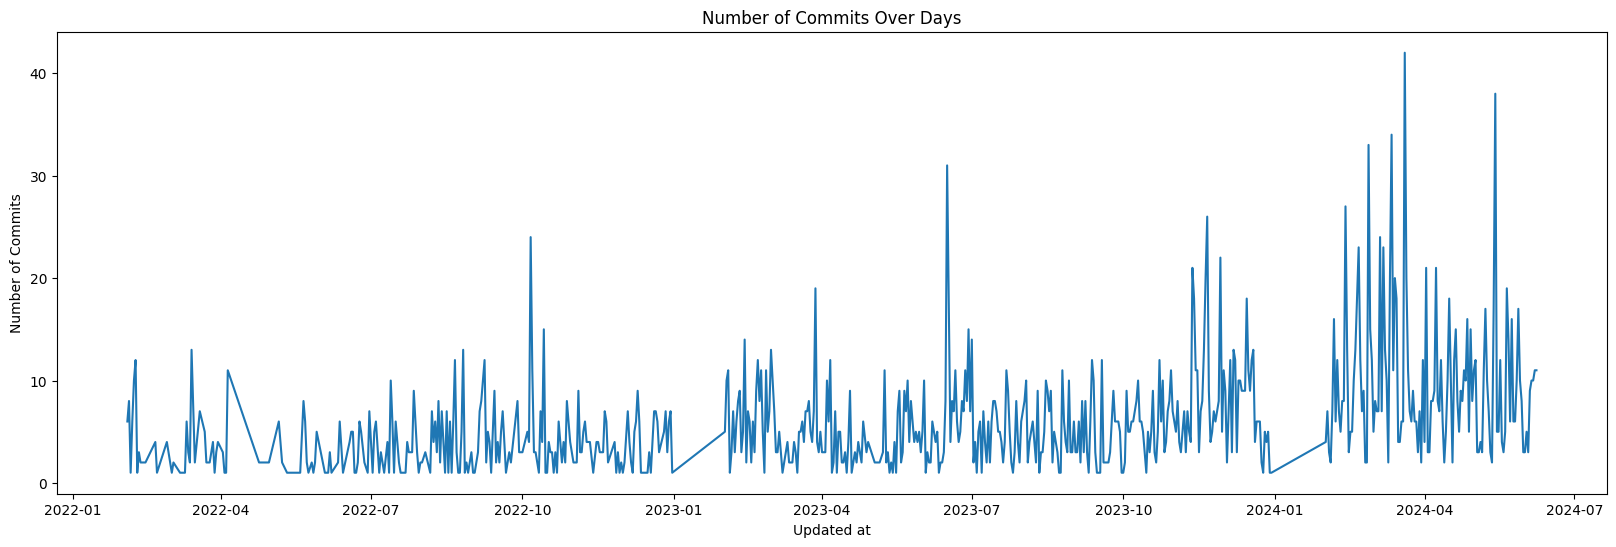

In [11]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=commit_counts, x='Updated at', y='Commit_count')
plt.title("Number of Commits Over Days")
plt.xlabel('Updated at')
plt.ylabel("Number of Commits")
plt.show()

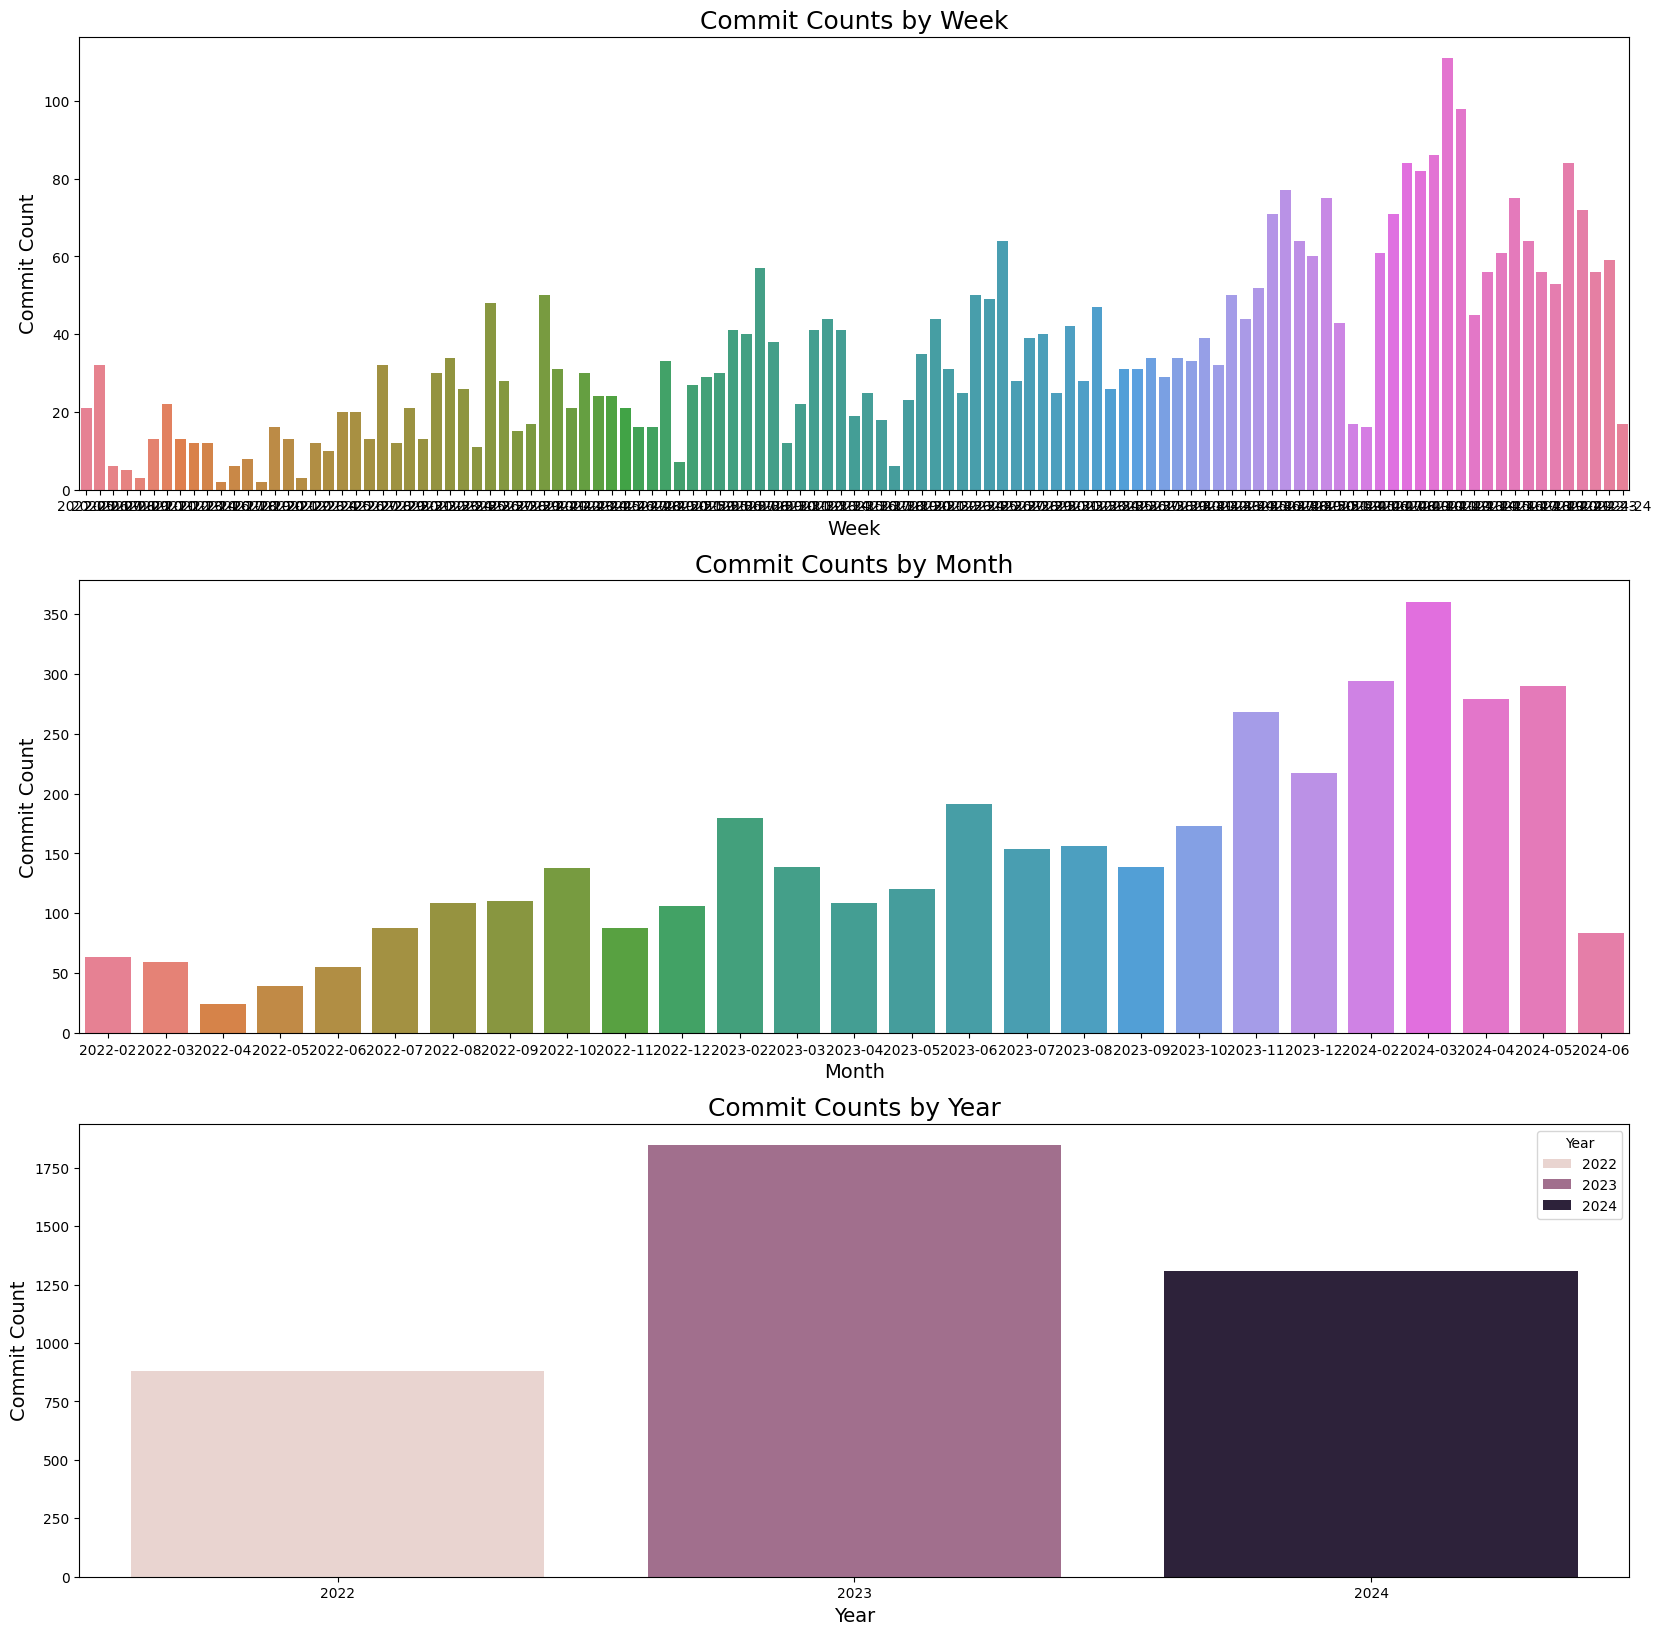

In [138]:
import numpy as np
num_weeks = len(commit_counts_by_weeks)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
sns.barplot(data = commit_counts_by_weeks,x='Week',y='Commit count', ax=axes[0], hue='Week')
axes[0].set_xlabel('Week',fontsize = 14)
axes[0].set_ylabel('Commit Count', fontsize = 14)
axes[0].set_title('Commit Counts by Week', fontsize = 18)
sns.barplot(data = commit_counts_by_months,x='Month',y='Commit count', ax=axes[1], hue = 'Month')
axes[1].set_xlabel('Month',fontsize = 14)
axes[1].set_ylabel('Commit Count', fontsize = 14)
axes[1].set_title('Commit Counts by Month', fontsize = 18)
sns.barplot(data = commit_counts_by_years,x='Year',y='Commit count', ax=axes[2], hue = 'Year')
axes[2].set_xlabel('Year', fontsize = 14)
axes[2].set_ylabel('Commit Count',fontsize = 14)
axes[2].set_title('Commit Counts by Year', fontsize = 18)
plt.show()

Các biểu đồ tổng quát

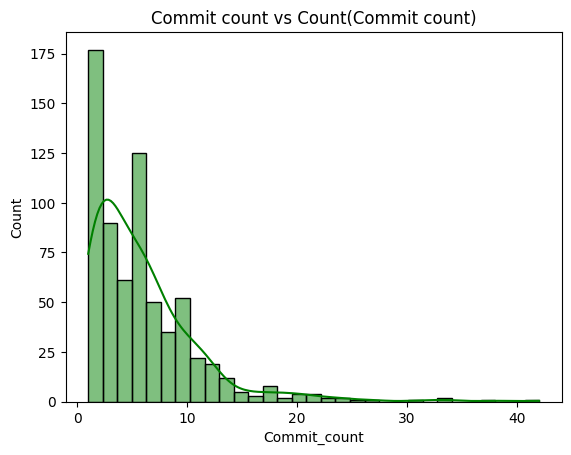

In [9]:
sns.histplot(commit_counts["Commit_count"], color = 'green',kde=True)
plt.title("Commit count vs Count(Commit count)")
plt.show()

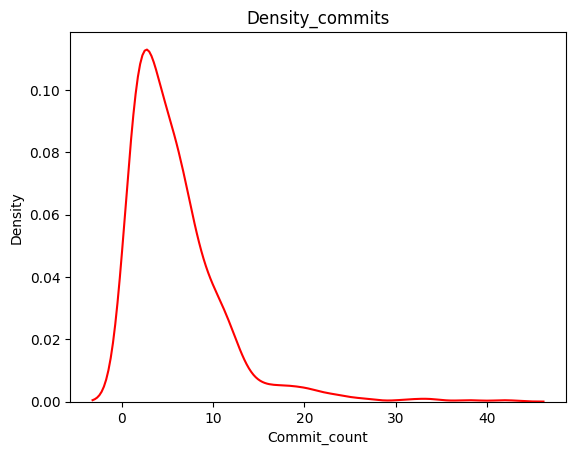

In [10]:
sns.kdeplot(data=commit_counts['Commit_count'], color = 'red')
plt.title('Density_commits')
plt.show()

In [52]:
df.dtypes

Unnamed: 0                      int64
Commit_message                 object
Author_email                   object
Author_name                    object
Updated at             datetime64[ns]
Files_changed                  object
Files_changed_count             int64
Contributor                   float64
All_checks_passed                bool
Additions                       int64
dtype: object

CONTRIBUTORS

Tổng số contributors đã đóng góp cho repo

In [11]:
df['Contributor'].nunique()

345

Người đóng góp nhiều commit nhất và % trên tổng số commit

In [7]:
max_commits = df['Contributor'].value_counts().head(1)
len(df.index)
percentageContribution = max_commits/len(df.index)
print(percentageContribution)

Contributor
alextran1502    0.227125
Name: count, dtype: float64


Thời gian hoạt động của các contributor

In [186]:
df['Updated at'] = pd.to_datetime(df['Updated at'])
time_activity = df.groupby('Contributor')['Updated at'].agg(['min', 'max'])
print(time_activity)

                            min                 max
Contributor                                        
3urobeat    2023-11-22 12:49:01 2023-11-22 12:49:01
416c616e    2023-06-23 16:12:11 2023-06-23 16:12:11
8gb         2023-12-05 02:07:20 2023-12-05 02:07:20
Aegeontis   2024-03-15 20:11:28 2024-03-15 20:11:28
Allram      2023-04-06 19:00:24 2023-04-06 19:00:24
...                         ...                 ...
xpwmaosldk  2022-06-22 05:23:35 2023-07-14 13:20:04
yparitcher  2024-04-15 18:24:13 2024-04-15 18:24:13
zackpollard 2022-06-06 02:12:12 2024-06-10 17:44:10
zeyadtamimi 2023-03-27 00:38:23 2023-03-27 00:38:23
zkhan93     2022-10-17 18:04:17 2023-06-18 03:49:19

[345 rows x 2 columns]


Top 5 người commit nhiều nhất

In [142]:
commit_count = df['Contributor'].value_counts()
commit_count.head(5)

Contributor
alextran1502       1180
jrasm91             513
renovate[bot]       312
mertalev            179
michelheusschen     177
Name: count, dtype: int64

Top 5 người commit nhiều file nhất

In [152]:
df

,Contributor,Commit_message,Author_email,Author_name,Updated at,Files_changed,Files_changed_count,All_checks_passed,Additions
0,alextran1502,Initial commit,alex.tran1502@gmail.com,Alex,2022-02-03 15:56:28,['LICENSE'],1,True,21
1,alextran1502,Transfer repository from Gitlab,alex.tran1502@gmail.com,Tran Alex,2022-02-03 16:06:44,"['mobile/.gitignore', 'mobile/.metadata', 'mob...",177,True,13300
2,alextran1502,Added successfully built docker-compose and co...,alex.tran1502@gmail.com,Alex Tran,2022-02-03 20:42:27,['mobile/lib/modules/home/views/home_page.dart...,15,True,198
3,alextran1502,"Add readme for top level folder, clean up dead...",alex.tran1502@gmail.com,Alex Tran,2022-02-03 21:27:31,"['README.md', 'server/Dockerfile', 'server/REA...",7,True,90
4,alextran1502,Update readme with known problem of cpu missin...,alex.tran1502@gmail.com,Alex Tran,2022-02-03 21:46:41,['README.md'],1,True,14
...,...,...,...,...,...,...,...,...,...
4028,alextran1502,feat(mobile): compatibility message warning (#...,alex.tran1502@gmail.com,Alex,2024-06-10 17:43:54,"['mobile/lib/pages/login/login.page.dart', 'mo...",10,True,350
4029,zackpollard,docs: otel metrics port worker split (#10085),zackpollard@ymail.com,Zack Pollard,2024-06-10 17:44:10,['docs/docs/install/environment-variables.md'],1,True,13
4030,alextran1502,Version v1.106.0,alex.tran1502@gmail.com,Alex The Bot,2024-06-10 17:50:00,"['cli/package-lock.json', 'e2e/package-lock.js...",16,True,25
4031,aviv926,docs: add detect duplicate assets to roadmap (...,51673860+aviv926@users.noreply.github.com,aviv,2024-06-10 21:49:10,['docs/src/pages/roadmap.tsx'],1,True,14


Tổng số files mà các contributor đã thay đổi

In [156]:
df_temp = df.groupby('Contributor', as_index = False)['Files_changed_count'].sum()
df_temp

,Contributor,Files_changed_count
0,3urobeat,11
1,416c616e,1
2,8gb,13
3,Aegeontis,1
4,Allram,4
...,...,...
340,xpwmaosldk,100
341,yparitcher,2
342,zackpollard,526
343,zeyadtamimi,1


Top 5 người có tổng số file thay đổi nhiều nhất

In [157]:
df_temp = df_temp.sort_values('Files_changed_count', ascending=False)
df_temp.head(5)

,Contributor,Files_changed_count
116,alextran1502,10817
215,jrasm91,8675
148,danieldietzler,1605
245,mertalev,1372
247,michelheusschen,1353


Top 5 người thay đổi nhiều file nhất trong 1 lần

In [155]:
df_temp = df.sort_values('Files_changed_count', ascending = False)
df_temp.head(5)

,Contributor,Commit_message,Author_email,Author_name,Updated at,Files_changed,Files_changed_count,All_checks_passed,Additions
3286,jrasm91,chore: migrate database files (#8126),jrasm91@gmail.com,Jason Rasmussen,2024-03-20 21:02:51,"['.github/workflows/test.yml', 'docs/docs/deve...",300,True,358
1459,jrasm91,refactor(server)*: tsconfigs (#2689)\n\n* refa...,jrasm91@gmail.com,Jason Rasmussen,2023-06-08 15:01:07,"['.github/workflows/test.yml', 'docker/docker-...",300,False,209
3802,jrasm91,chore: bump open-api (#9522),jrasm91@gmail.com,Jason Rasmussen,2024-05-15 21:52:52,"['mobile/openapi/.openapi-generator/VERSION', ...",300,True,437
3849,jrasm91,chore: gitignore open api docs/tests (#9643),jrasm91@gmail.com,Jason Rasmussen,2024-05-21 15:35:20,"['.gitattributes', '.gitignore', 'mobile/opena...",300,True,4
3267,danieldietzler,chore(server): use absolute import paths (#808...,36593685+danieldietzler@users.noreply.github.com,Daniel Dietzler,2024-03-20 18:32:04,"['.vscode/settings.json', 'server/.eslintrc.js...",300,True,1946


Top 5 người có nhiều từ nhất thêm nhất trong 1 lần commit 

In [158]:
df_temp = df.sort_values('Additions', ascending = False)
df_temp.head(5)

,Contributor,Commit_message,Author_email,Author_name,Updated at,Files_changed,Files_changed_count,All_checks_passed,Additions
3987,weblate,chore: update translations (#10003)\n\n* chore...,hosted@weblate.org,Weblate bot,2024-06-06 17:20:41,"['web/src/lib/constants.ts', 'web/src/lib/i18n...",32,True,24245
665,alextran1502,feat(app) add documentation site template (#87...,alex.tran1502@gmail.com,Alex,2022-10-28 02:38:26,"['documentation/.gitignore', 'documentation/RE...",56,True,22826
2747,benmccann,chore: remove axios dependency from CLI (#6888),322311+benmccann@users.noreply.github.com,Ben McCann,2024-02-05 19:29:00,"['cli/package-lock.json', 'cli/package.json', ...",218,True,22789
1645,etnoy,feat(cli) Add new CLI (#3066)\n\n* Add new cli...,jonathan@jogenfors.se,Jonathan Jogenfors,2023-07-06 14:37:47,"['.github/workflows/test.yml', 'cli/.editorcon...",53,False,21349
1696,alextran1502,chore(web): Update to Svelte 4 (#3196)\n\n* tr...,alex.tran1502@gmail.com,Alex,2023-07-16 01:13:04,"['.github/workflows/test.yml', 'web/package-lo...",17,False,20695


top 5 người có số lần all checks passed cao nhất và tỉ lệ all checks passed/ số lần commit

In [26]:
top_all_checks_passed = df[df["All_checks_passed"]]
top_all_checks_passed = top_all_checks_passed['Author_name'].value_counts()
list_tmp = top_all_checks_passed.head(5)
list_tmp

Author_name
Alex                569
Alex Tran           317
Jason Rasmussen     243
renovate[bot]       219
Michel Heusschen    146
Name: count, dtype: int64

In [29]:
df_temp = pd.merge(top_all_checks_passed, commit_count, on="Author_name", how="inner").head(5)
df_temp['scale'] = df_temp['count_x']/df_temp['count_y']
df_temp

,count_x,count_y,scale
Author_name,,,
Alex,569,738,0.771003
Alex Tran,317,343,0.924198
Jason Rasmussen,243,511,0.475538
renovate[bot],219,312,0.701923
Michel Heusschen,146,177,0.824859


Những từ được sử dụng trong commit message nhiều nhất

In [182]:
word_counts = {}
for cm in df['Commit_message']:
    words = cm.split()
    for w in words:
        if w in word_counts:
            word_counts[w] += 1
        else:
            word_counts[w] = 1
word_data = []
for word, count in word_counts.items():
    word_info = {
       'Word': word,
       'Count': count
    }
    word_data.append(word_info)
word_df = pd.DataFrame(word_data) 
word_df = word_df.sort_values('Count', ascending =False)
word_df = word_df.reset_index(drop = True)
word_df

,Word,Count
0,*,8712
1,to,2138
2,Co-authored-by:,1184
3,for,1137
4,the,886
...,...,...
12774,destroy,1
12775,(#3309),1
12776,(#3301),1
12777,iterators,1


top 5 đuôi email nhiều người dùng nhất

In [184]:
df['email_types'] = df['Author_email'].str.extract(r'@([\w\.-]+)', expand=False)
df['email_types'].value_counts().head(5)

email_types
gmail.com                   1994
users.noreply.github.com    1558
bo0tzz.me                     69
jogenfors.se                  54
ymail.com                     52
Name: count, dtype: int64

Người hoạt động đều đặn nhất- người có thời gian đóng góp dài nhất

In [189]:
time_activity['duration'] = time_activity['max'] - time_activity['min']
commits = df['Contributor'].value_counts()
longest_contributor = time_activity.sort_values(by = 'duration', ascending = False).iloc[0]
average_time_between_commits = time_activity['duration']/commits
most_regular_author = average_time_between_commits.sort_values().head(1)

In [190]:
most_regular_author

Contributor
3urobeat   0 days
dtype: timedelta64[ns]

In [191]:
longest_contrib_author = time_activity.sort_values(by='duration', ascending=False).index[0]
longest_contrib_author

'alextran1502'

ISSUES

Tổng số issues đã được mở và đóng góp trong repo này:

In [32]:
issue_df.shape[0]

7259

In [80]:
issue_df

,Unnamed: 0,Created_at,Closed_at,State,Labels,Assignees
0,0,2024-06-08 22:16:00,Not yet closed,open,"['dependencies', 'renovate']",[]
1,1,2024-06-08 19:45:48,2024-06-08 19:51:36,closed,['📱mobile'],[]
2,2,2024-06-08 18:23:28,Not yet closed,open,['🖥️web'],[]
3,3,2024-06-08 17:01:24,2024-06-08 17:55:19,closed,['🗄️server'],[]
4,4,2024-06-08 10:44:16,2024-06-08 10:50:14,closed,['📱mobile'],[]
...,...,...,...,...,...,...
7254,7254,2022-02-06 06:37:29,2022-02-08 06:27:24,closed,['enhancement'],[]
7255,7255,2022-02-06 06:37:24,2022-02-08 03:44:44,closed,['enhancement'],[]
7256,7256,2022-02-06 06:37:08,2022-02-06 06:50:47,closed,[],[]
7257,7257,2022-02-06 06:07:43,2022-02-06 06:07:56,closed,[],[]


In [86]:
issue_df.dtypes

Unnamed: 0             int64
Created_at    datetime64[ns]
Closed_at             object
State                 object
Labels                object
Assignees             object
dtype: object

In [93]:
issue_df['Closed_at'] = pd.to_datetime(issue_df['Closed_at'], utc= False)
issue_df['Closed_at'] = issue_df['Closed_at'].dt.tz_localize(None)

/tmp/ipykernel_11058/4117738989.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  issue_df['Closed_at'] = pd.to_datetime(issue_df['Closed_at'], utc= False)


DateParseError: Unknown datetime string format, unable to parse: Not yet closed, at position 0

In [87]:
issue_df['Created_at'] = pd.to_datetime(issue_df['Created_at'], utc=False)
issue_df['Created_at'] = issue_df['Created_at'].dt.tz_localize(None)

Thời gian trung bình để một issue được giải quyết

In [113]:
issue_df['duration'] = pd.to_datetime(issue_df['Closed_at'])-pd.to_datetime(issue_df['Created_at'])
issue_df['duration'].mean()

Timedelta('13 days 05:12:05.048519495')

In [34]:
issue_df['State'].value_counts() 

State
closed    6822
open       437
Name: count, dtype: int64

PULL REQUEST

Tổng số pull request đã được tạo ra và merge

In [35]:
pr_df.shape[0]

4323

In [36]:
len(pr_df[pr_df['Merged_at'].notnull()])

3776

pull request đã bị reject

In [37]:
len(pr_df[(pr_df['Merged_at'].isnull()) & (pr_df['Pr_state'] != 'open')])

505

LANGUAGES

Ngôn ngữ lập trình được sử dụng

In [116]:
languages = pd.read_csv(os.path.join('languages.csv'))
languages

,language,lines,percentage
0,TypeScript,2122047,44.788871
1,Dart,1473953,31.109910
2,Svelte,894367,18.876909
3,Python,105702,2.230994
4,Swift,29812,0.629225
5,Kotlin,28373,0.598853
6,JavaScript,22221,0.469006
7,Shell,14193,0.299564
8,Mustache,12571,0.265329
9,C++,9834,0.207561


Vẽ biểu đồ pie thể hiện tỷ lệ các ngôn ngữ lập trình được sử dụng trong repo này

FILES

Các files trong repo có nhiều commits nhất

In [39]:
df_exploded = df.explode('Files_changed')
file_counts = df_exploded['Files_changed'].value_counts()
file_counts

Files_changed
['README.md']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Kích thước trung bình của các files

Tăng trưởng repo

Theo số lượng commits và contributors

Nhận xét các giai đoạn nổi bật

Dự đoán

Phân tích mạng lưới cộng tác: Vẽ mạng lưới (network graph) thể hiện sự cộng tác giữa các contributors. Ai là người có nhiều kết nối nhất

VISUALIZATION

Relationships between commits and contributors

In [3]:
commit_contributor = pd.DataFrame()
commit_contributor['commits'] = df['Contributor'].value_counts()
commit_contributor

,commits
Contributor,
"NamedUser(login=""alextran1502"")",1176
"NamedUser(login=""jrasm91"")",511
"NamedUser(login=""renovate[bot]"")",312
"NamedUser(login=""mertalev"")",179
"NamedUser(login=""michelheusschen"")",177
...,...
"NamedUser(login=""cycneuramus"")",1
"NamedUser(login=""dfcowell"")",1
"NamedUser(login=""austinvaness"")",1


/tmp/ipykernel_1560/3357995599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Contributor', order=df['Contributor'].value_counts().head(10).index, palette=colors)


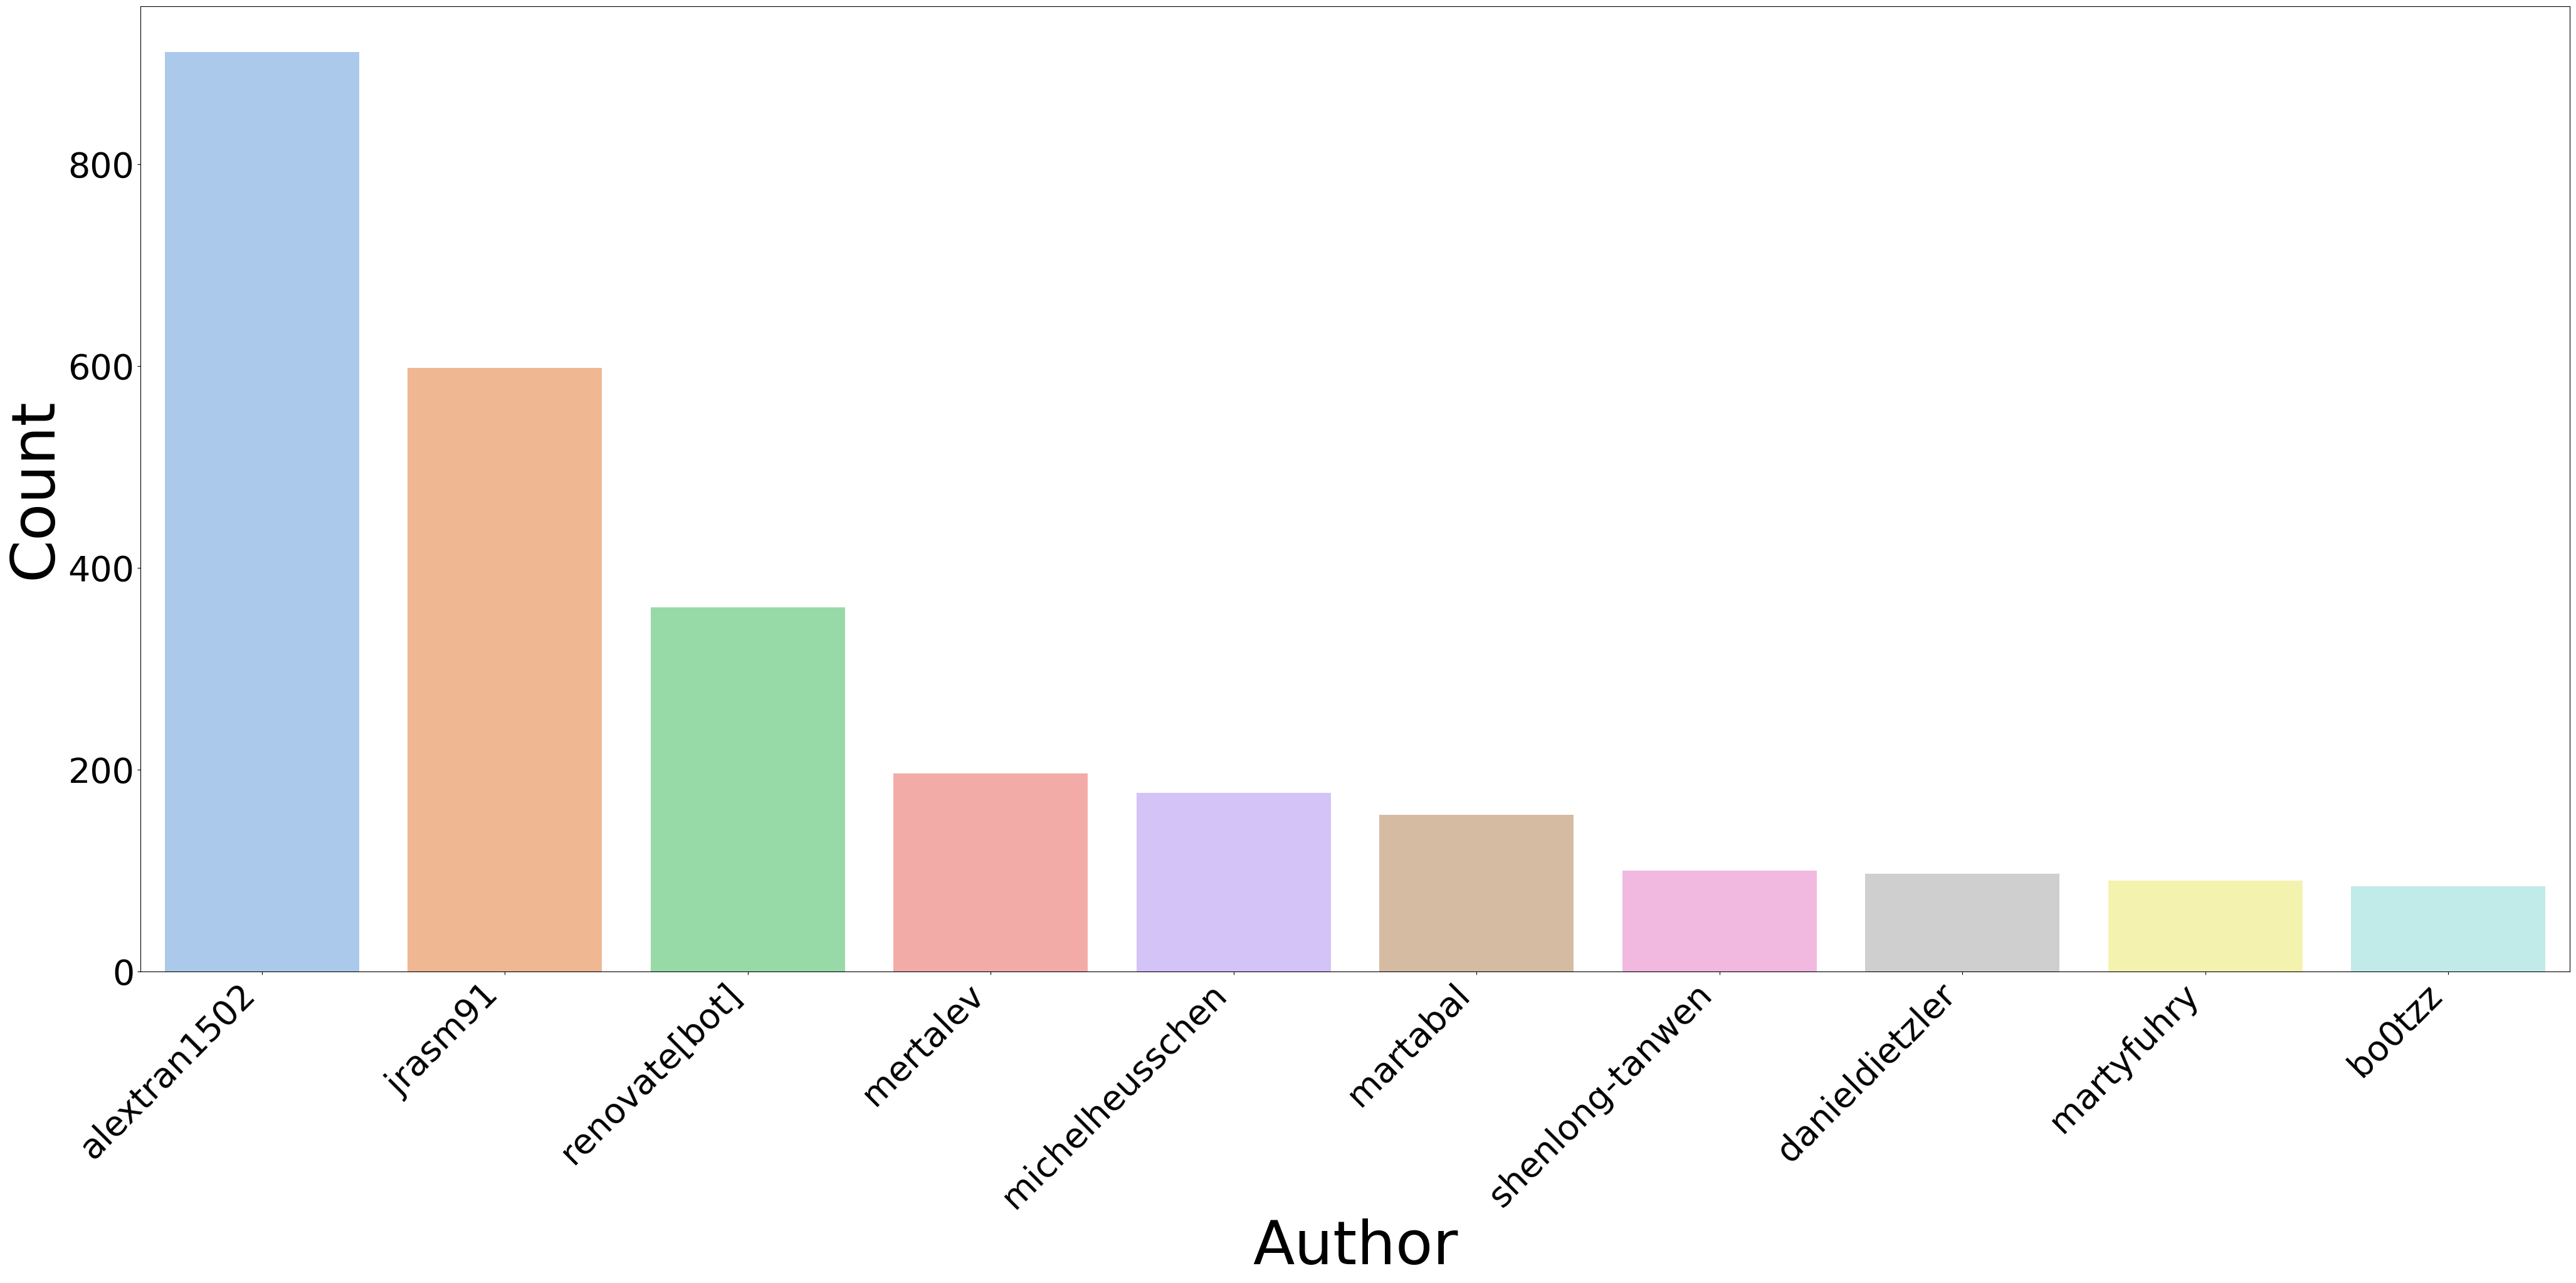

In [19]:
plt.figure(figsize=(50, 20))
colors = sns.color_palette("pastel", len(df['Contributor'].value_counts().head(10))) 
sns.countplot(data=df, x='Contributor', order=df['Contributor'].value_counts().head(10).index, palette=colors)
plt.xticks(rotation=45, ha='right', fontsize=40) 
plt.yticks(fontsize=40) 
plt.xlabel('Author', fontsize=70)
plt.ylabel('Count', fontsize=70) 
plt.show()

In [47]:
# so.Plot(df,"Additions", fillcolor='green').scale(x='log').add(so.Bar(), so.Hist())

Text(0.5, 1.0, 'Additions-Commits-Rejected')

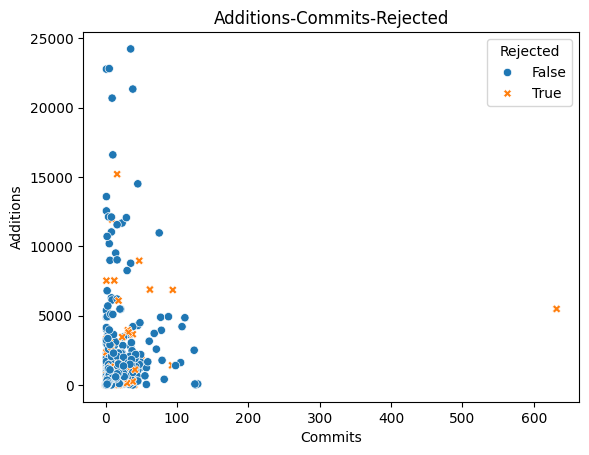

In [10]:
pr_df['Rejected'] = (pr_df['Merged_at'].isnull()) & (pr_df['Pr_state'] != 'open')
g = sns.scatterplot(data=pr_df, x='Commits', y='Additions', hue='Rejected', style = 'Rejected')
plt.title('Additions-Commits-Rejected')